<a href="https://colab.research.google.com/github/MaLuisa7/Nonparametric-methods/blob/main/Cardiovascular_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Búsqueda del mejor K para el algoritmo de KNN utilizando superficie de respuesta y Kruskal Wallies


* Dataset [ECV]( https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset?resource=download)

* Métricas de evaluación [métricas de evaluación y otros métodos](https://dataminingbook.info/book_html/chap22/book.html)

# importacion de librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from scipy import stats

# lectura de datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path  = '/content/drive/MyDrive/dataset_flower/CVD_cleaned.csv'
df = pd.read_csv(path, sep =',')

In [5]:
df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4


In [18]:
df.rename(columns = {"Height_(cm)"	: 'Height', "Weight_(kg)":	'Weight'}, inplace = True)
df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4


# Analisis descriptivo general

## Limpieza de Nans

No hay datos nan, es decir vacios, en la base de datos

In [19]:
df.info() # no hay nans

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308774 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  object 
 1   Checkup                       308774 non-null  object 
 2   Exercise                      308774 non-null  object 
 3   Heart_Disease                 308774 non-null  object 
 4   Skin_Cancer                   308774 non-null  object 
 5   Other_Cancer                  308774 non-null  object 
 6   Depression                    308774 non-null  object 
 7   Diabetes                      308774 non-null  object 
 8   Arthritis                     308774 non-null  object 
 9   Sex                           308774 non-null  object 
 10  Age_Category                  308774 non-null  object 
 11  Height                        308774 non-null  int64  
 12  Weight                        308774 non-nul

## Duplicados

El número de muestras del df original es de 308854, sin embargo se encontraron 80 registros duplicados, los cuales se quitaron y el número de muestras quedo en 308,774.  

In [20]:
df.drop_duplicates(inplace=True) # df original 308854 --> df sin duplicados 308774 , habia 80 dupliados
df.shape

(308774, 19)

## Valores unicos por columna

Se establecen los valores unicos por fila, para identifican el tipo de variable.

* De las columnas que son:
  1. General_Health
  2. Checkup
  3. Exercise
  4. Heart_Disease
  5. Skin_Cancer
  6. Other_Cancer
  7. Depression
  8. Diabetes
  9. Arthritis
  10. Sex
  11. Age_Category
  12. Height_(cm)
  13. Weight_(kg)
  14. BMI
  15. Smoking_History
  16. Alcohol_Consumption
  17. Fruit_Consumption
  18. Green_Vegetables_Consumption
  19. FriedPotato_Consumption

Se conoce que la columna llamada "Heart_Disease" es la variable respuesta, ya que se quiere conocer si una persona presentará o no alguna enfermedad del corazón.

Las demás variables se manejaran como independientes.

In [21]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height', 'Weight', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [22]:
lst_values = []
for i in range(0 ,df.shape[1]):
  vals = df.iloc[:,i].unique()
  lst_values.append([df.iloc[:,i].name, len(vals), vals])
df_values = pd.DataFrame(lst_values)
df_values

,0,1,2
0,General_Health,5,"[Poor, Very Good, Good, Fair, Excellent]"
1,Checkup,5,"[Within the past 2 years, Within the past year..."
2,Exercise,2,"[No, Yes]"
3,Heart_Disease,2,"[No, Yes]"
4,Skin_Cancer,2,"[No, Yes]"
5,Other_Cancer,2,"[No, Yes]"
6,Depression,2,"[No, Yes]"
7,Diabetes,4,"[No, Yes, No, pre-diabetes or borderline diabe..."
8,Arthritis,2,"[Yes, No]"
9,Sex,2,"[Female, Male]"


## Agrupación de las columnas conforme al tipo de variable, ya sea continua o categorica.

In [24]:

df_continuas = df.loc[:, ['Height', 'Weight', 'BMI',
                          'Alcohol_Consumption', 'Fruit_Consumption',
                          'Green_Vegetables_Consumption', 'FriedPotato_Consumption'] ]
df_continuas.describe()   # 7

,Height,Weight,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## Quitar datos atipicos

In [71]:
consulta = " (Height < 230) & (Height >100) & (Weight<280) "
df= df.query(consulta )
print(df.shape)

(308750, 19)


In [30]:
df_continuas = df.loc[:, ['Height', 'Weight', 'BMI',
                          'Alcohol_Consumption', 'Fruit_Consumption',
                          'Green_Vegetables_Consumption', 'FriedPotato_Consumption'] ]
df_continuas.describe()

,Height,Weight,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308750.000000,308750.000000,308750.000000,308750.000000,308750.000000,308750.000000,308750.000000
mean,170.619255,83.589291,28.623455,5.097791,29.834144,15.109526,6.296949
std,10.640928,21.335348,6.508755,8.200534,24.878260,14.925912,8.583187
min,102.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,229.000000,274.420000,99.170000,30.000000,120.000000,128.000000,128.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

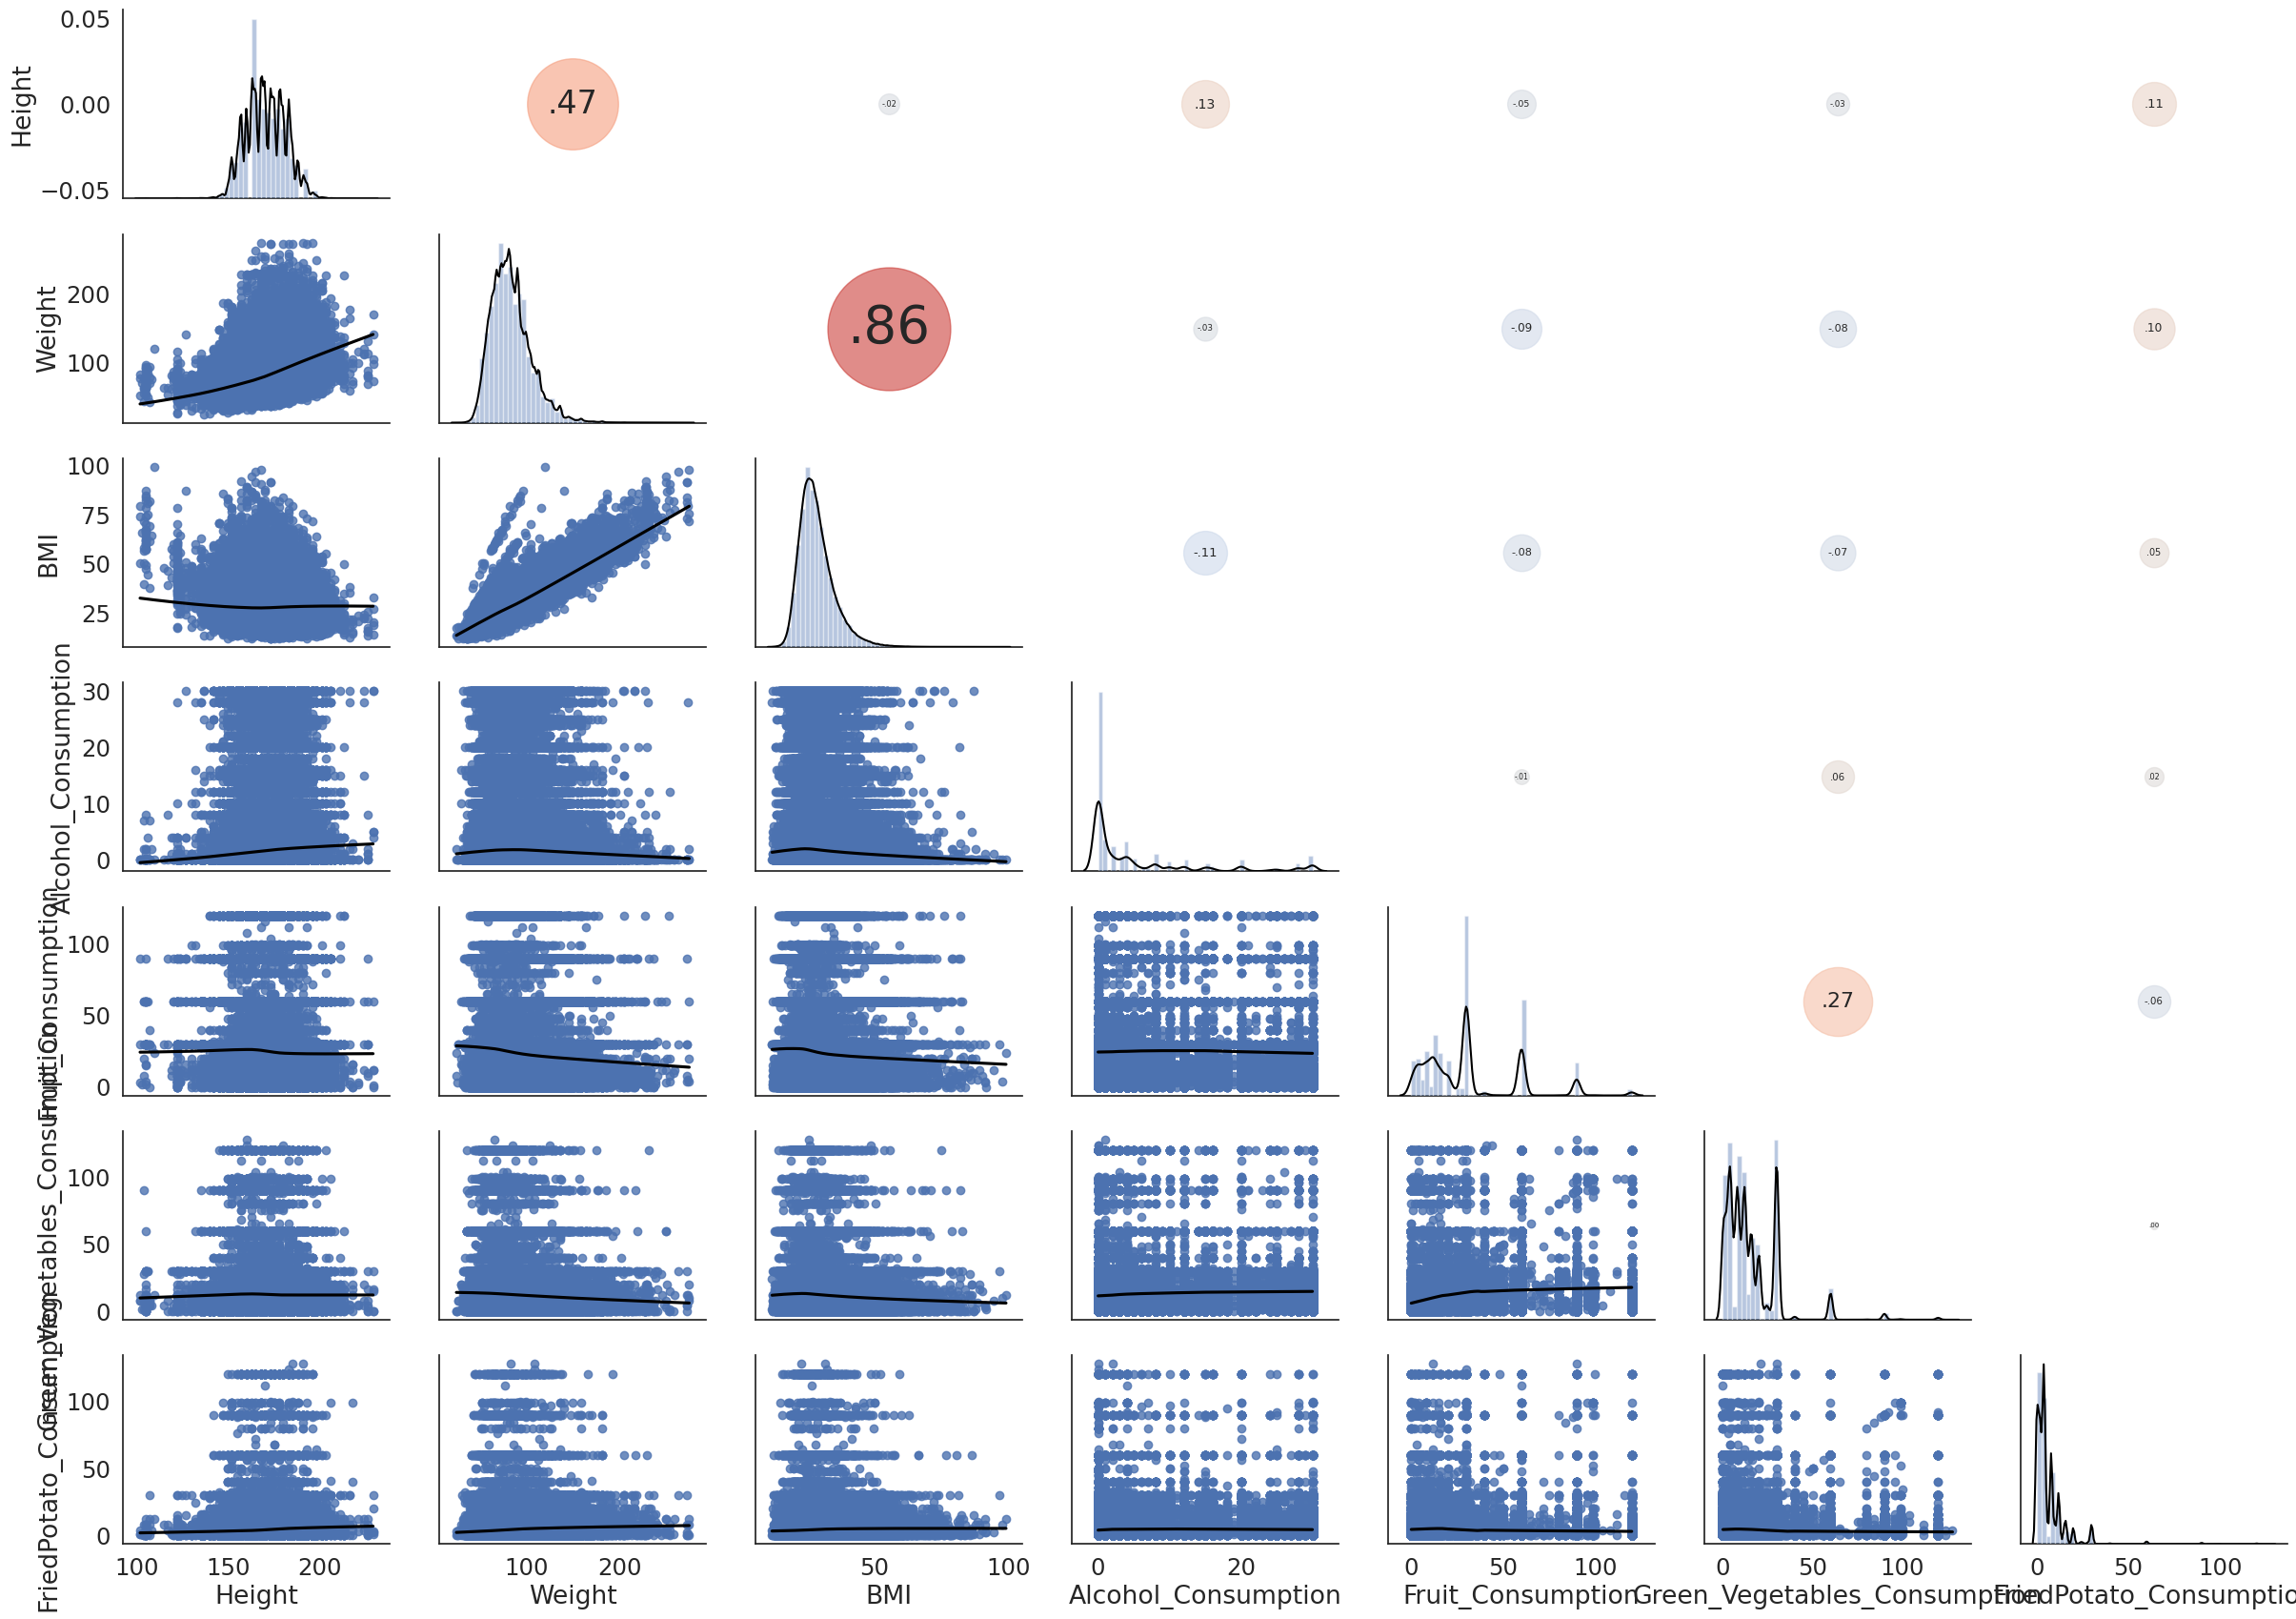

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(df_continuas, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

In [34]:
df_categoricas = df.loc[:, ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
                            'Skin_Cancer',   'Other_Cancer', 'Depression',
                            'Diabetes', 'Arthritis', 'Sex','Smoking_History','Age_Category']]#12
df_categoricas.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Age_Category
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,Yes,70-74
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,No,70-74
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,No,60-64
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,No,75-79
4,Good,Within the past year,No,No,No,No,No,No,No,Male,Yes,80+


In [68]:
gen_health_vs_age = pd.crosstab(df.General_Health, df.Age_Category)
exercise_vs_depresion = pd.crosstab(df.Exercise, df.Depression, normalize=True)*100
diabetes_vs_sex = pd.crosstab(df.Diabetes, df.Sex)
HeartDise_vs_age = pd.crosstab( df_categoricas.Heart_Disease, df_categoricas.Age_Category)
HeartDise_vs_sex = pd.crosstab( df_categoricas.Heart_Disease, df_categoricas.Sex )
HeartDise_vs_diabetes= pd.crosstab( df_categoricas.Heart_Disease, df_categoricas.Diabetes )


Text(0.5, 1.0, 'Conteo de enfermedades del corazon y diabetes')

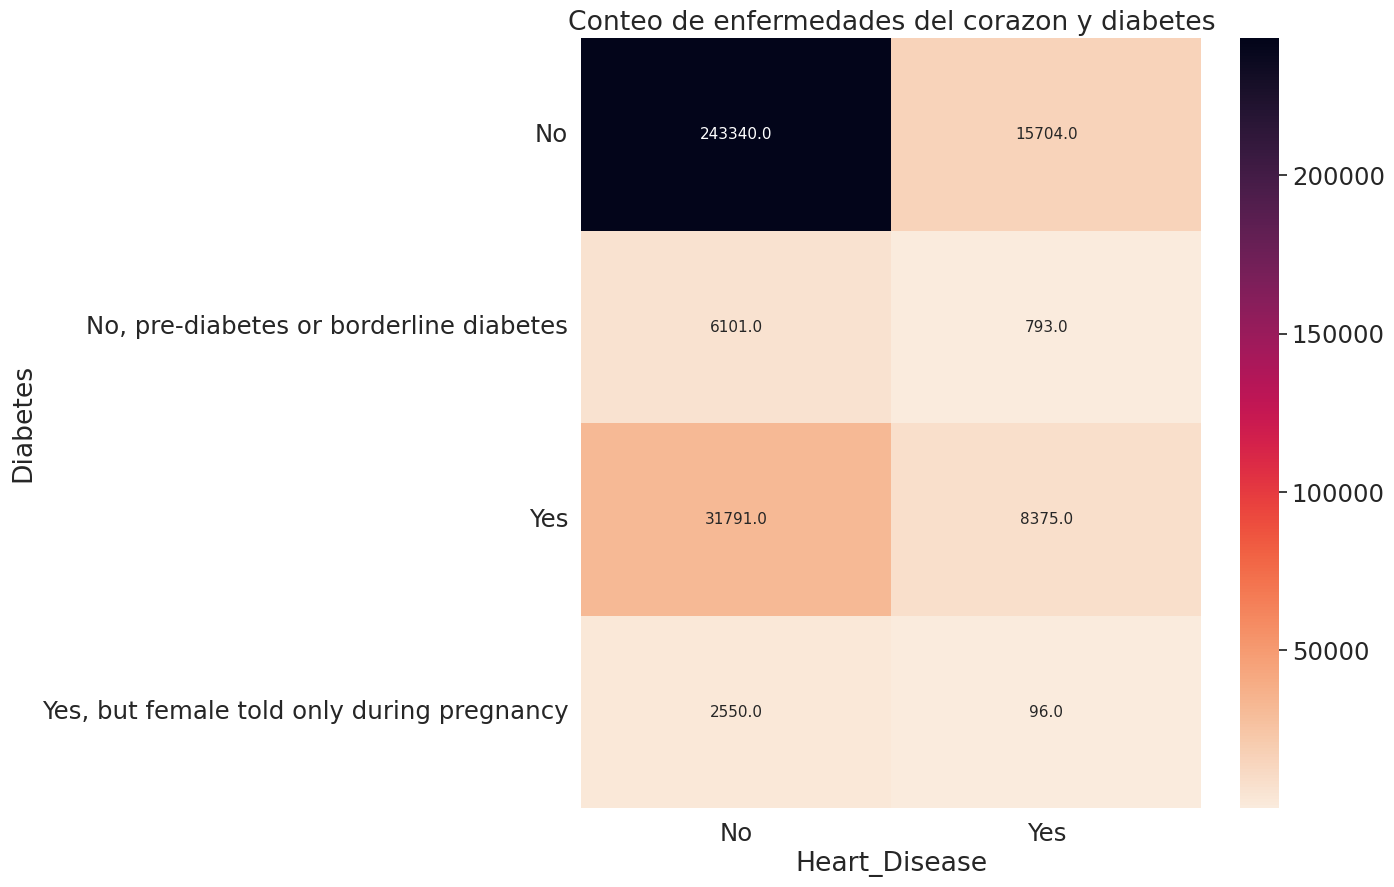

In [70]:
plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(HeartDise_vs_diabetes.T, annot=True, annot_kws={"fontsize":11}, fmt=".1f",cmap = cmap)
plt.title("Conteo de enfermedades del corazon y diabetes")

La mayoria de las personas presentaron no tener diabetes ni enfermedades del corazon y solo el 2.71% de laspersonas presentaron ambas enfermedades.

Text(0.5, 1.0, 'Conteo de enfermedades del corazon y tipo de sexo')

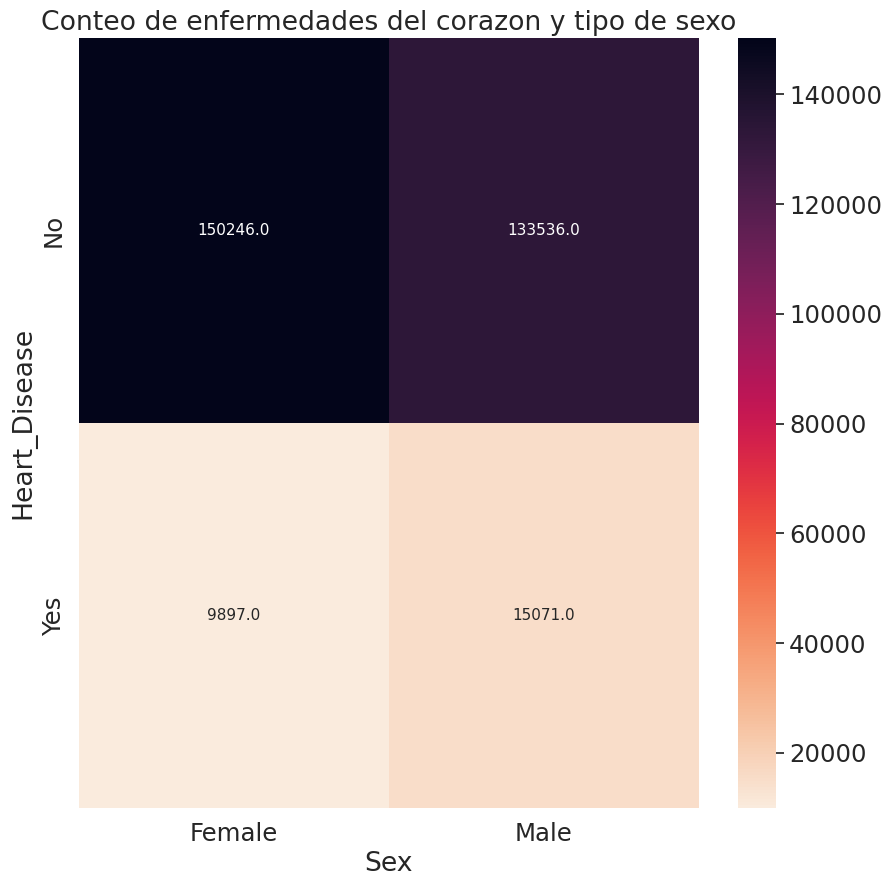

In [67]:
plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(HeartDise_vs_sex, annot=True, annot_kws={"fontsize":11}, fmt=".1f",cmap = cmap)
plt.title("Conteo de enfermedades del corazon y tipo de sexo")

Los hombres presentan mas enfermedades cardiovasculares que las mujeres

Text(0.5, 1.0, 'Conteo de Diabetes y tipo de sexo')

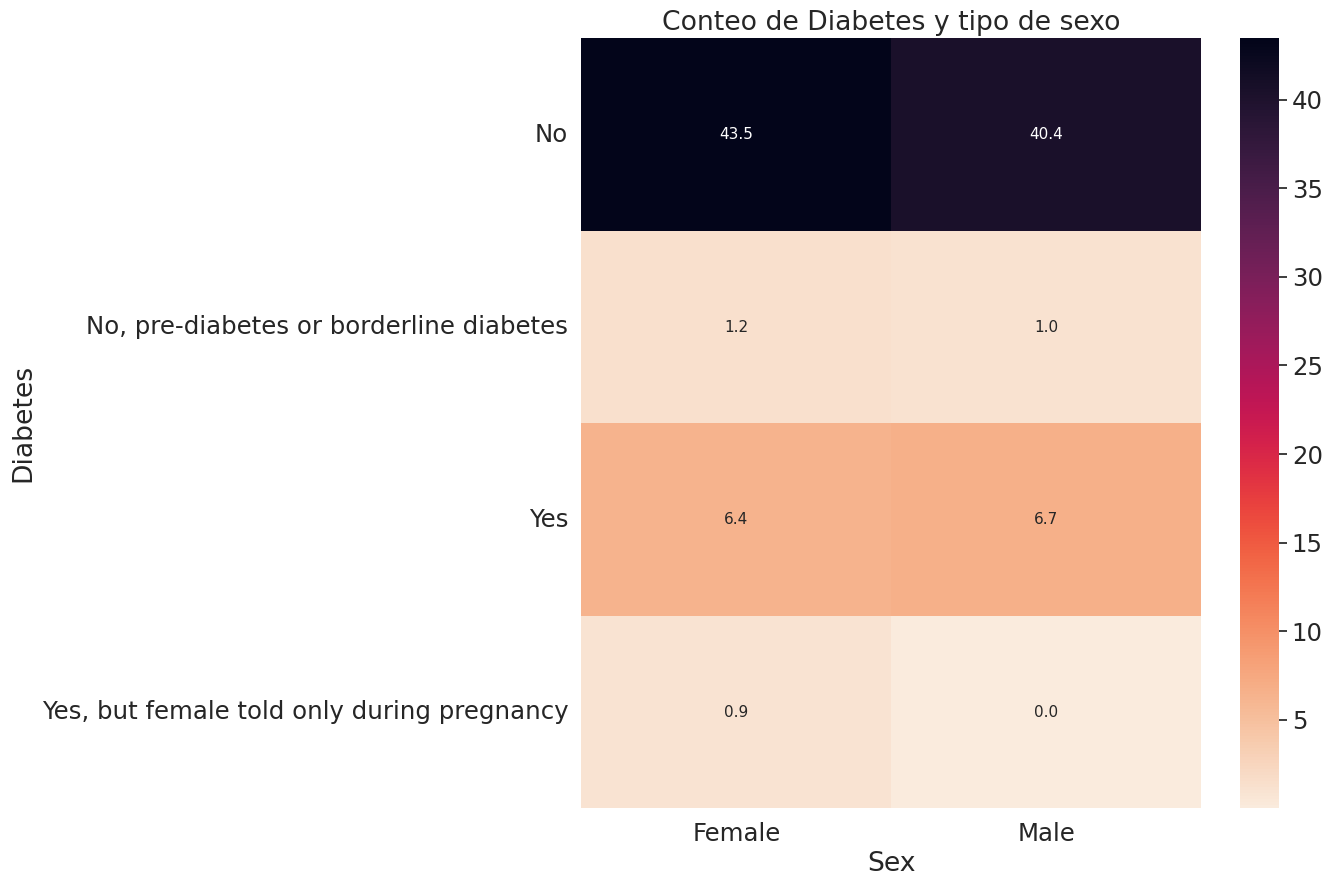

In [64]:
plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(diabetes_vs_sex, annot=True, annot_kws={"fontsize":11}, fmt=".1f",cmap = cmap)
plt.title("Conteo de Diabetes y tipo de sexo")

Los hombres suelen presentar mas diabetes que las mujeres.

Text(0.5, 1.0, 'Conteo de ejericicio y depresion')

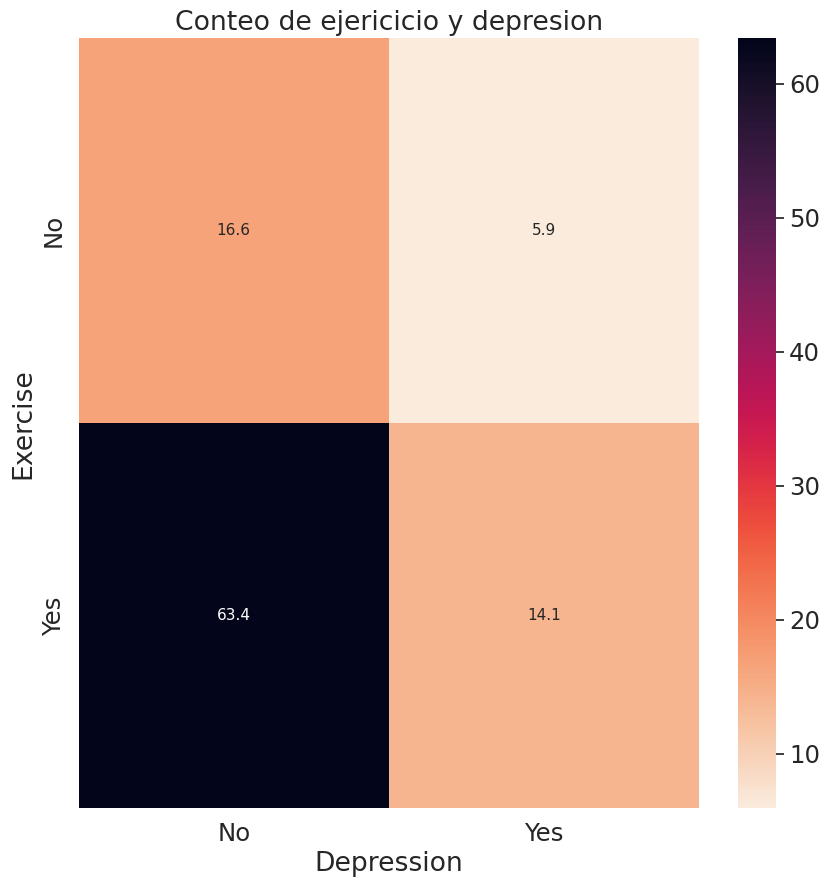

In [61]:
plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(exercise_vs_depresion, annot=True, annot_kws={"fontsize":11}, fmt=".1f",cmap = cmap)
plt.title("Conteo de ejericicio y depresion")

Se observa que la mayoria, 64%, de las personas que se ejercitan no tienen depresion.  

Text(0.5, 1.0, 'Conteo de grupo de edad y tipo de salud')

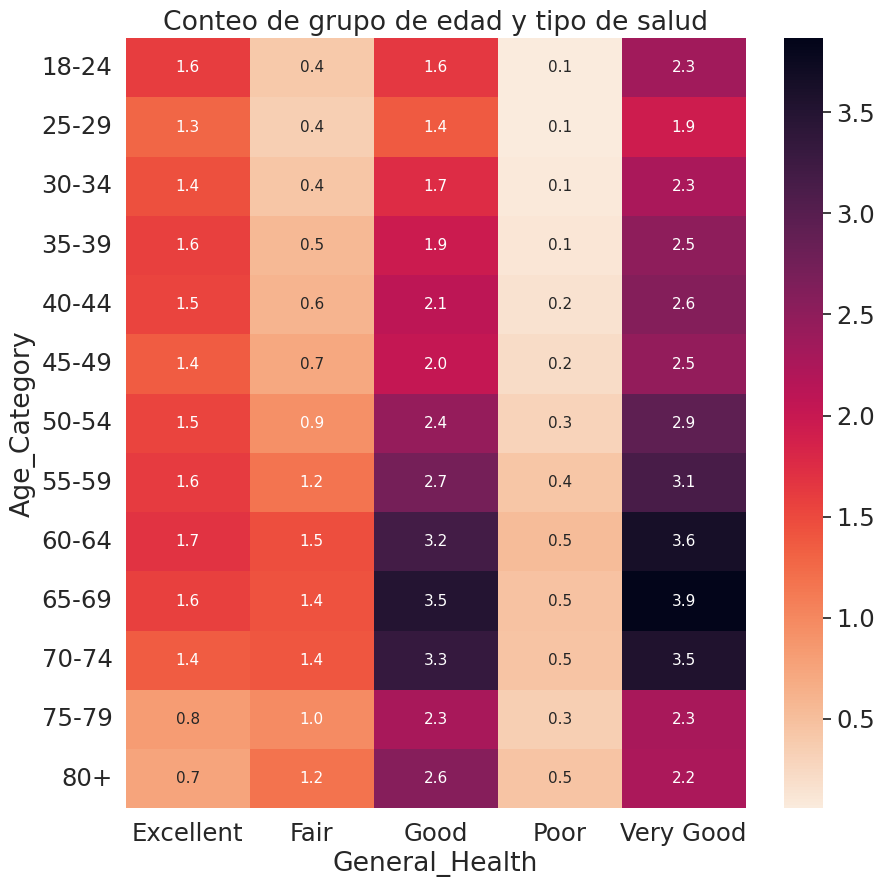

In [59]:
plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(gen_health_vs_age.T, annot=True, annot_kws={"fontsize":11}, fmt=".1f",cmap = cmap)
plt.title("Conteo de grupo de edad y tipo de salud")

Se observa que la mayoria de las personas, tienen un estilo de vida entre bueno y muy bueno en un rango de edad entre los 50 y 75 a;os

### Comparacion entre variables continuas y categoricas

In [74]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height', 'Weight', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

Text(0.5, 1.0, 'Comparacion entre si presenta enfermedad del corazon y consumo de papa frita')

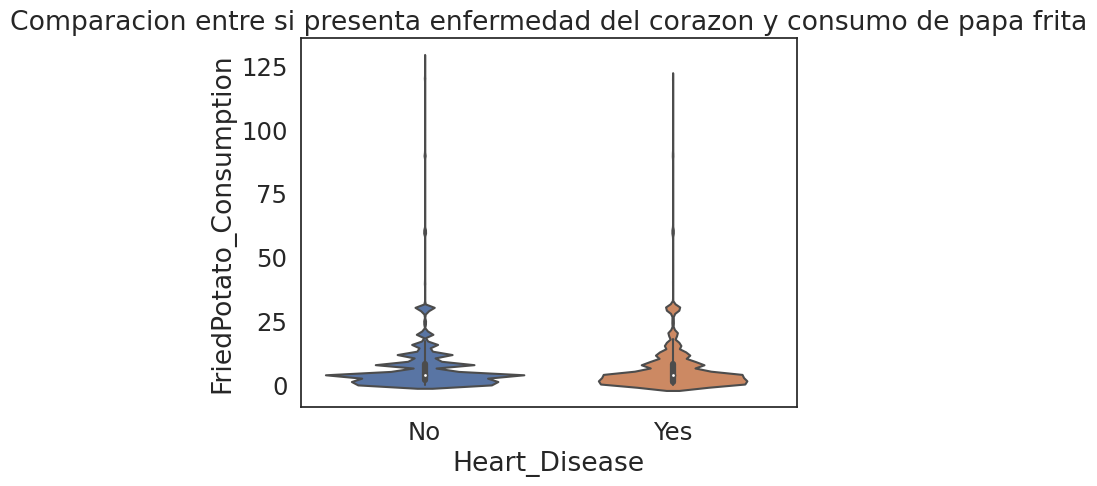

In [79]:
sns.violinplot(data=df, x="Heart_Disease", y="FriedPotato_Consumption")
plt.title("Comparacion entre si presenta enfermedad del corazon y consumo de papa frita")

Text(0.5, 1.0, 'Comparacion entre si presenta enfermedad del corazon y consumo de vegetales ')

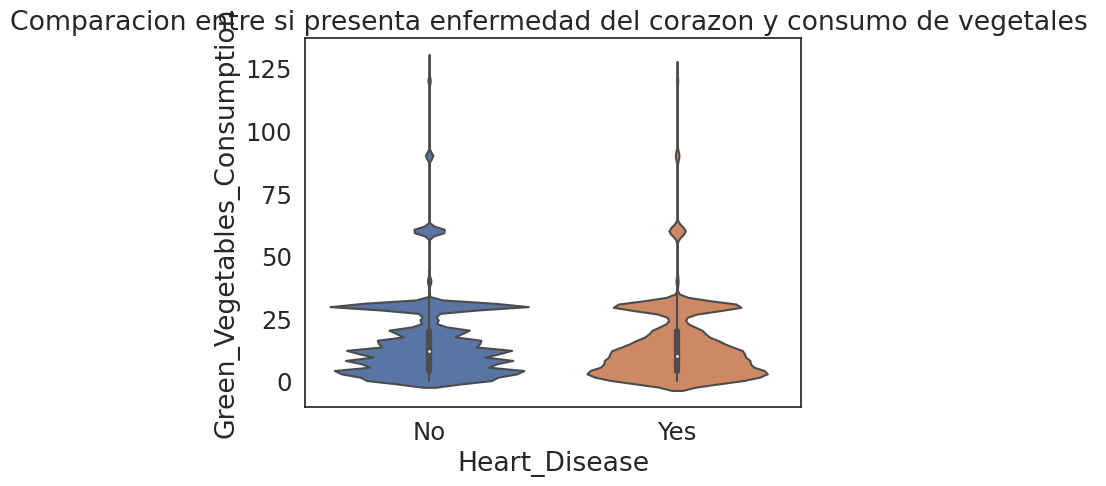

In [78]:
sns.violinplot(data=df, x="Heart_Disease", y="Green_Vegetables_Consumption")
plt.title("Comparacion entre si presenta enfermedad del corazon y consumo de vegetales ")

Text(0.5, 1.0, 'Comparacion entre si presenta enfermedad del corazon y peso ')

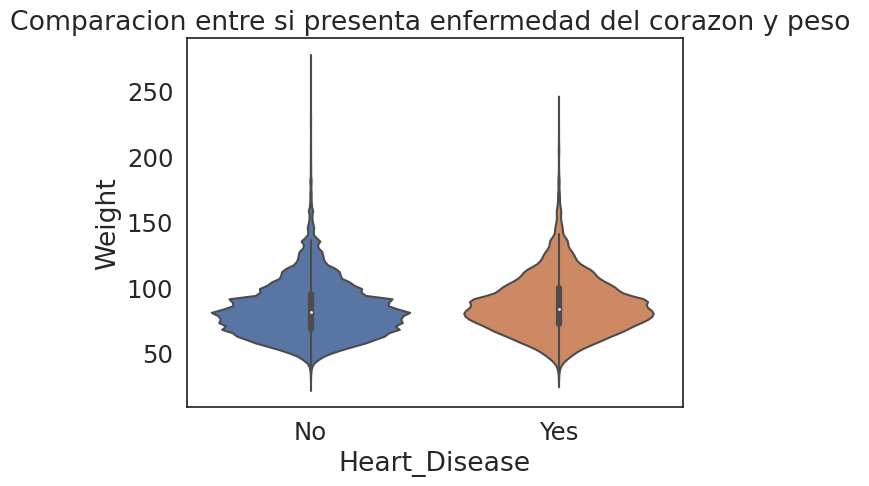

In [77]:
sns.violinplot(data=df, x="Heart_Disease", y="Weight")
plt.title("Comparacion entre si presenta enfermedad del corazon y peso ")

### conteos de respuesta por tipo de variable


In [72]:
for i in range(0 , df_categoricas.shape[1]):
  print(df_categoricas.iloc[:,i].value_counts())
  print('------------------------------------')

Very Good    110346
Good          95348
Excellent     55924
Fair          35805
Poor          11327
Name: General_Health, dtype: int64
------------------------------------
Within the past year       239276
Within the past 2 years     37208
Within the past 5 years     17440
5 or more years ago         13419
Never                        1407
Name: Checkup, dtype: int64
------------------------------------
Yes    239290
No      69460
Name: Exercise, dtype: int64
------------------------------------
No     283782
Yes     24968
Name: Heart_Disease, dtype: int64
------------------------------------
No     278759
Yes     29991
Name: Skin_Cancer, dtype: int64
------------------------------------
No     278873
Yes     29877
Name: Other_Cancer, dtype: int64
------------------------------------
No     246857
Yes     61893
Name: Depression, dtype: int64
------------------------------------
No                                            259044
Yes                                            40166
No,

In [73]:
df1 = df.copy()
df1.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4


# Preprocesamiento de datos

Los valores categoricos se cambiaron por numeros.

In [ ]:
df2 = df1.copy()
df2['Checkup'] =df1['Checkup'].replace({'Within the past 2 years':0, "Within the past year":1, 'Within the past 5 years':2,'5 or more years ago':3 ,'Never':4 })
df2['General_Health'] =df1['General_Health'].replace({'Poor':0, "Fair":1, 'Good':2,'Very Good':3,'Excellent':4})
df2['Exercise']= df1['Exercise'].replace({'Yes':1, "No":0})
df2['Heart_Disease']= df1['Heart_Disease'].replace({'Yes':1, "No":0})
df2['Skin_Cancer']= df1['Skin_Cancer'].replace({'Yes':1, "No":0})
df2['Other_Cancer']= df1['Other_Cancer'].replace({'Yes':1, "No":0})
df2['Depression']= df1['Depression'].replace({'Yes':1, "No":0})
df2['Diabetes']= df1['Diabetes'].replace({'Yes':1, "No":0,"No, pre-diabetes or borderline diabetes":2,"Yes, but female told only during pregnancy":3 })
df2['Arthritis']= df1['Arthritis'].replace({'Yes':1, "No":0})
df2['Smoking_History']= df1['Smoking_History'].replace({'Yes':1, "No":0})
df2['Sex']= df1['Sex'].replace({'Female':1, "Male":0})
df2['Age_Category'] =  df1['Age_Category'].replace({'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12,'80+':13})
df2.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,0,0,0,1,1,11,150,32.66,14.54,1,0,30,16,12
1,3,1,0,1,0,0,0,1,0,1,11,165,77.11,28.29,0,0,30,0,4
2,3,1,1,0,0,0,0,1,0,1,9,163,88.45,33.47,0,4,12,3,16


# Subsampling

Se realizo un subsampling aleatorio para que ambas clases fueran de igual tama;o

In [ ]:
df2.Heart_Disease.value_counts()

0    283717
1     24966
Name: Heart_Disease, dtype: int64

In [ ]:
#se hizo un subsampling para tener mismo numero de muestras en ambas clases
df_0 = df2.query("Heart_Disease == 0").sample(n=24966, replace=False, random_state=7) #(24966, 19)
df_1 = df2.query("Heart_Disease == 1")
df3 = pd.concat([df_0, df_1], axis =0)
df3.shape

(49932, 19)

# Modelo de KNN con diferentes parametros para generar datos

No es necesario correrlo, ya que tengo los resultados guardados.
Aqui se toma una muestra de 1000 muestras de cada clase, formando un total de 2000 muestras por 18 columnas o variables, para la matriz X (variables independientes) y siendo Hearth_Disease la variable y.

Se  tomaron 100 vecinos para calcular diferentes metricas del rendimiento del algoritmo de KNN, como es la exactitud, sensibildiad, recall y F1. Esto se realizo 30 veces para cada vecinos, de tal manera que se obtuvo 30 muestras de metricas de evaluacion para el vecino 1, 2, .. ,100.

Con estas muestras se realizara pruebas de medianas en el proximo paso.



In [ ]:
# YA LO TENGO, NO SE TIENE QUE VOLVER A CORRER Y PERDER COMO 1 HR

# lst_resultados_v1 =[]

# for num_vecinos in range(1,100):
#   for i in range(1,31):

#     df_sample = df3.groupby("Heart_Disease").sample(n=1000, random_state=i).reset_index(drop=True) #muestra aleatoria de 100 elementos con random_state de 1 a 30 #---- 1000 de cada clase
#     # se separan por grupos de train y test para cada clase
#     lim_train_0 = int(len(df_sample)*.80 /2)
#     lim_test_0 = int(len(df_sample)/2 )
#     lim_train_0,lim_test_0

#     df_sample_0 = df_sample.query("Heart_Disease == 0 ").reset_index(drop=True)
#     df_sample_0_train = df_sample_0.iloc[:lim_train_0 , : ]
#     df_sample_0_test = df_sample_0.iloc[lim_train_0: lim_test_0,:]

#     df_sample_1 = df_sample.query("Heart_Disease == 1 ").reset_index(drop=True)
#     df_sample_1_train = df_sample_1.iloc[:lim_train_0  ,:]
#     df_sample_1_test =  df_sample_1.iloc[lim_train_0: lim_test_0,:]

#     df_sample_train = pd.concat([df_sample_0_train,df_sample_1_train], axis=0)
#     df_sample_test = pd.concat([df_sample_0_test,df_sample_1_test], axis=0)

#     #tomamos la variable respuesta
#     y_train = df_sample_train['Heart_Disease']
#     y_test = df_sample_test['Heart_Disease']
#     X_train = df_sample_train.drop(columns= ['Heart_Disease'])
#     X_test = df_sample_test.drop(columns= ['Heart_Disease'])

#     #Modelo de knn
#     knn_v1 = KNeighborsClassifier(n_neighbors= num_vecinos ,weights='uniform', p = 1)
#     knn_v1.fit(X_train, y_train)
#     y_pred_v1 = knn_v1.predict(X_test) #prediccion

#     #accuracies
#     acc_v1 = accuracy_score(y_test, y_pred_v1) # (TP + TN) / Total de muestras

#     #presicion
#     pres_v1 = precision_score(y_test, y_pred_v1) # = TruePositives / (TruePositives + FalsePositives)

#     #recall
#     rec_v1 = recall_score(y_test, y_pred_v1)     #  TruePositives / (TruePositives + FalseNegatives)***

#     #f1
#     f1_v1 = f1_score(y_test, y_pred_v1) # = (2 * Precision * Recall) / (Precision + Recall)

#     lst_resultados_v1.append([num_vecinos,i,  acc_v1,pres_v1,rec_v1,f1_v1])

# df1 = pd.DataFrame(lst_resultados_v1, columns =['num_vecinos', 'rnd_state', 'acc_v1','pres_v1','rec_v1','f1_v1'])
# df1.head()

# Grupos de muestra por vecino

In [81]:
path  = '/content/drive/MyDrive/dataset_flower/df1_resultados_cardiovascular_anova.xlsx'
df = pd.read_excel(path)
df = df.iloc[:,1:].query("num_vecinos<=100")
df

,num_vecinos,rnd_state,acc_v1,pres_v1,rec_v1,f1_v1
0,1,1,0.5825,0.582090,0.585,0.583541
1,1,2,0.5950,0.597938,0.580,0.588832
2,1,3,0.5775,0.587571,0.520,0.551724
3,1,4,0.5975,0.593301,0.620,0.606357
4,1,5,0.5475,0.542222,0.610,0.574118
...,...,...,...,...,...,...
2965,99,26,0.6600,0.649533,0.695,0.671498
2966,99,27,0.6200,0.611111,0.660,0.634615
2967,99,28,0.6375,0.613169,0.745,0.672686
2968,99,29,0.6825,0.646586,0.805,0.717149


In [82]:
data = df.loc[:, ['num_vecinos', 'acc_v1']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text

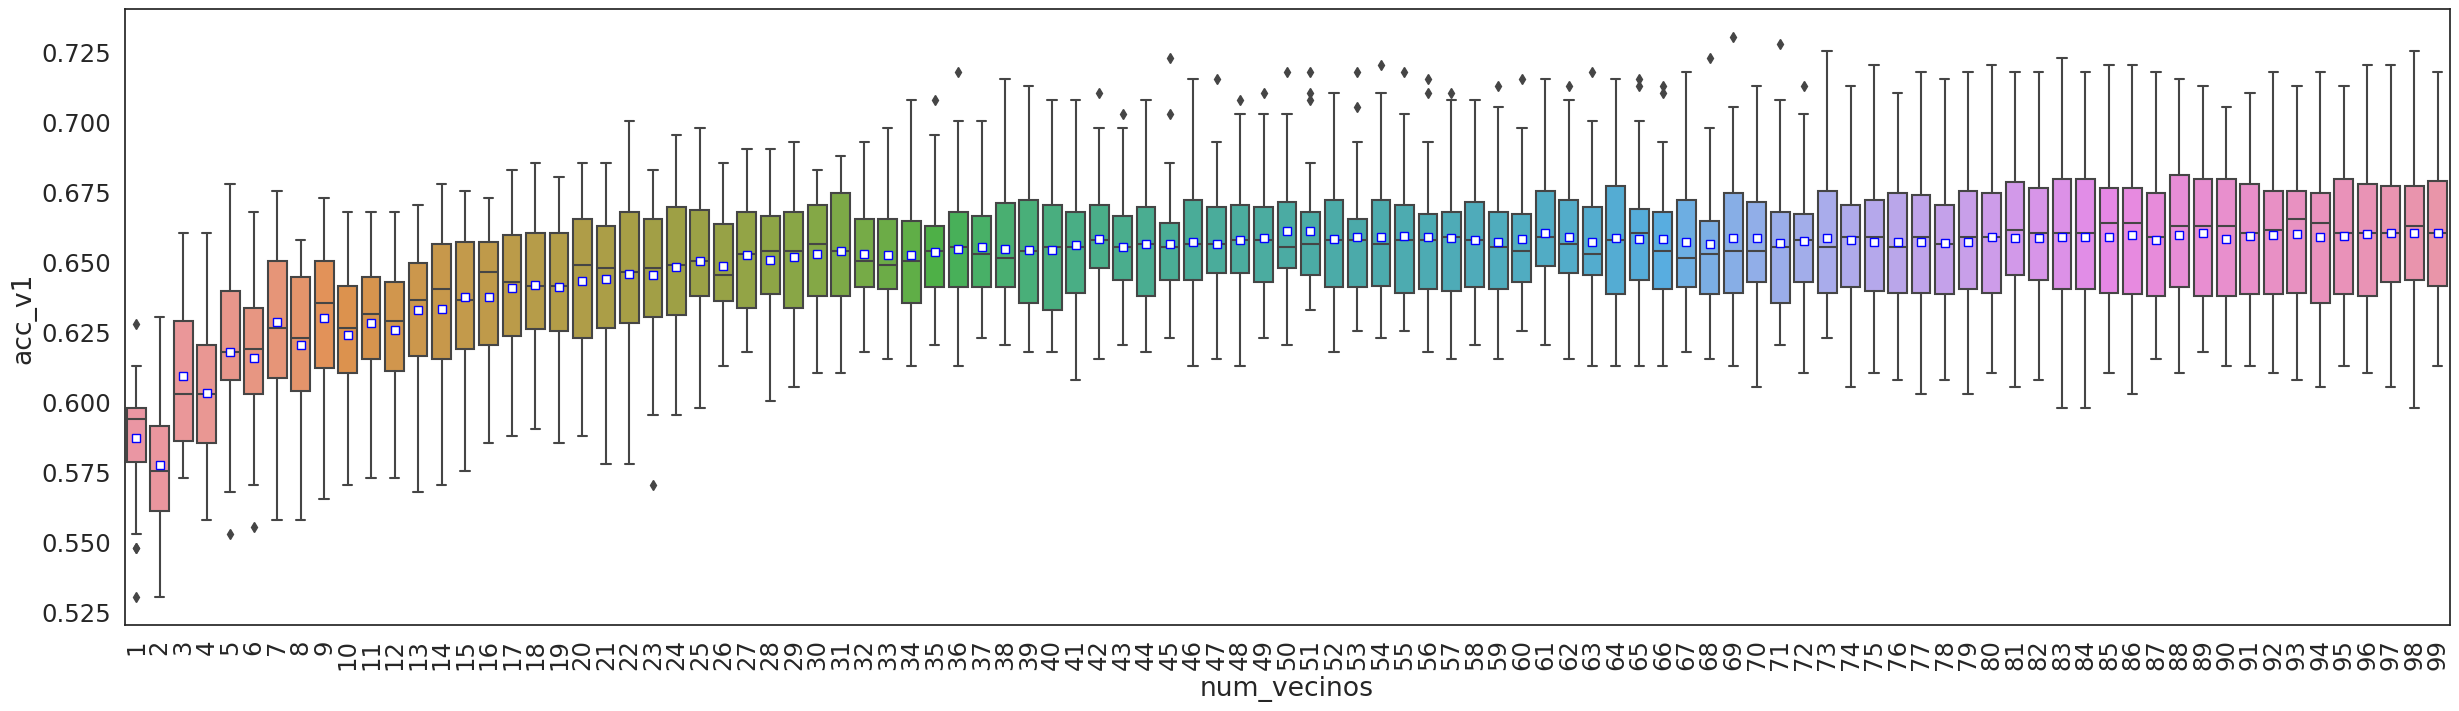

In [87]:
plt.figure(figsize=(30,8))
sns.boxplot(data=data, x="num_vecinos", y=data.iloc[:,1].name, orient='v', showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
plt.xticks(rotation = 90)

* Se observa la variabilidad de las cajas y bigotes de cada vecino.
* Se observa que entre mas crece el numero de vecinos, la media (cuadro blanco)tiende hacia el mismo valor, el mismo caso se presenta para la mediana (linea que atraviesa la caja).

In [ ]:
print('----iteracion : 0 ')
nv_min, nv_medio ,nv_max = data.num_vecinos.min(),int(data.num_vecinos.mean()), data.num_vecinos.max()
print('niveles min, mean, max: ',nv_min, nv_medio,nv_max)
rango =30 #10 #------------------------------------------------------------------------------------------------------- depende de este tercero # el punto inicial del rango
factor = .8#------------------------------------------------------------------------------------------------------- depende de este segundo -- hace el intervalo mas peque;o cada vezque itera
nv_alto, nv_bajo = nv_max-rango, nv_min + rango
print('niveles para ejercicio',nv_bajo, nv_medio,nv_alto)
alfa = 0.7 #-------------------------------------------------------------------------------------------------------todo depende de este primeramente , si es muy peque;o, no entra en la condicion
#si queremos que itere varias veces, tenemso que ser mas flexibles en el pvalor

#definicion de los 3 grupos
niv_menos1 = data.query("num_vecinos == @nv_bajo").iloc[:,-1]
niv_0 = data.query("num_vecinos == @nv_medio").iloc[:,-1]
niv_mas1 = data.query("num_vecinos == @nv_alto").iloc[:,-1]

media_menos1, media_0, media_mas1 = niv_menos1.median(), niv_0.median(), niv_mas1.median()
lst_medias = [media_menos1, media_0, media_mas1]

# H0: The median is equal across all groups.
# H1: The median is not equal across all groups.
# si pval < H0 --> se rechaza H0
kruskal_wallies = stats.kruskal(niv_menos1, niv_0, niv_mas1)
pval = kruskal_wallies.pvalue
print('pval',pval) # 0.004 < 0.05 --> rechazo H0, existe diferencia entre grupos
if pval < alfa:
  print('pval < alfa')
  gpo_winner = np.argmax(lst_medias) #0,1,2 --> -1 ,0,1
  new_rango = int(rango * factor )
  print(f'gpo_winner:{gpo_winner},new_rango: {new_rango},factor: {factor}')
  if gpo_winner == 0:
    nv_medio = nv_min
    nv_alto = nv_medio + new_rango
    nv_bajo = nv_medio - new_rango
    print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')
  if gpo_winner == 1:
    nv_medio = nv_medio
    nv_alto = nv_medio + new_rango
    nv_bajo = nv_medio - new_rango
    print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')
  if gpo_winner == 2:
    nv_medio = nv_alto
    nv_alto = nv_medio + new_rango
    if nv_alto > nv_max:
      nv_alto=nv_max
    nv_bajo = nv_medio - new_rango
    print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')

cont_tope = 0
if pval < alfa:
  for i in range(1,10):
    print('----iteracion : ', str(i))
    print('niveles para ejercicio',nv_bajo, nv_medio,nv_alto)

    #definicion de los 3 grupos
    niv_menos1 = data.query("num_vecinos == @nv_bajo").iloc[:,-1]
    niv_0 = data.query("num_vecinos == @nv_medio").iloc[:,-1]
    niv_mas1 = data.query("num_vecinos == @nv_alto").iloc[:,-1]

    media_menos1, media_0, media_mas1 = niv_menos1.mean(), niv_0.mean(), niv_mas1.mean()
    lst_medias = [media_menos1, media_0, media_mas1]

    # H0: The median is equal across all groups.
    # H1: The median is not equal across all groups.
    # si pval < H0 --> se rechaza H0
    kruskal_wallies = stats.kruskal(niv_menos1, niv_0, niv_mas1)
    pval = kruskal_wallies.pvalue
    print(f'pval: {pval}') # 0.004 < 0.05 --> rechazo H0, existe diferencia entre grupos
    if pval < alfa:
      print('pval < alfa')
      gpo_winner = np.argmax(lst_medias) #0,1,2 --> -1 ,0,1
      new_rango = int(new_rango * factor )
      print(f'gpo_winner:{gpo_winner},new_rango: {new_rango},factor: {factor}')
      if gpo_winner == 0:
        nv_medio = nv_min
        nv_alto = nv_medio + new_rango
        if nv_alto > nv_max:
          nv_alto=nv_max
        nv_bajo = nv_medio - new_rango
        print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')

      elif gpo_winner == 1:
        nv_medio = nv_medio
        nv_alto = nv_medio + new_rango
        if nv_alto > nv_max:
          nv_alto=nv_max
        nv_bajo = nv_medio - new_rango
        print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')

      elif gpo_winner == 2:
        nv_medio = nv_alto
        nv_bajo = nv_medio - new_rango
        nv_alto = nv_medio + new_rango
        if nv_alto > nv_max:
          nv_alto=nv_max

        print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')

      elif nv_alto == nv_medio:
        print('\n***nv_alto == nv_medio**********************************************')
        cont_tope +=1
        if cont_tope ==3:
          print('ya topo con el valor maximo 3 veces ')
          break
        nv_medio = int((nv_bajo + nv_alto) /2)
        # break

    else:# pval> alfa:
      break


----iteracion : 0 
niveles min, mean, max:  1 50 99
niveles para ejercicio 31 50 69
pval 0.01550250754839345
pval < alfa
gpo_winner:2,new_rango: 24,factor: 0.8
nv_bajo: 45,nv_medio: 69,nv_alto:93
----iteracion :  1
niveles para ejercicio 45 69 93
pval: 0.19255530133008153
pval < alfa
gpo_winner:2,new_rango: 19,factor: 0.8
nv_bajo: 74,nv_medio: 93,nv_alto:99
----iteracion :  2
niveles para ejercicio 74 93 99
pval: 0.023074881117715745
pval < alfa
gpo_winner:2,new_rango: 15,factor: 0.8
nv_bajo: 84,nv_medio: 99,nv_alto:99
----iteracion :  3
niveles para ejercicio 84 99 99
pval: 0.06622287485173617
pval < alfa
gpo_winner:1,new_rango: 12,factor: 0.8
nv_bajo: 87,nv_medio: 99,nv_alto:99

***nv_alto == nv_medio**********************************************
----iteracion :  4
niveles para ejercicio 87 93 99
pval: 0.9284953551910399


# Ignorar

In [ ]:
print('----iteracion : 0 ')
rango = 5
factor = 1
nv_min =  data.num_vecinos.min()
print('niveles min : ',nv_min )
nv_bajo, nv_medio, nv_alto,  = nv_min+ rango, nv_min+ rango + rango, nv_min + rango + rango  + rango
print('niveles para ejercicio',nv_bajo, nv_medio,nv_alto)
alfa = 0.20

#definicion de los 3 grupos
niv_menos1 = data.query("num_vecinos == @nv_bajo").iloc[:,-1]
niv_0 = data.query("num_vecinos == @nv_medio").iloc[:,-1]
niv_mas1 = data.query("num_vecinos == @nv_alto").iloc[:,-1]

media_menos1, media_0, media_mas1 = niv_menos1.mean(), niv_0.mean(), niv_mas1.mean()
lst_medias = [media_menos1, media_0, media_mas1]

# H0: The median is equal across all groups.
# H1: The median is not equal across all groups.
# si pval < H0 --> se rechaza H0
kruskal_wallies = stats.kruskal(niv_menos1, niv_0, niv_mas1)
pval = kruskal_wallies.pvalue
print('pval',pval) # 0.004 < 0.05 --> rechazo H0, existe diferencia entre grupos
if pval < alfa:
  print('pval < alfa')
  gpo_winner = np.argmax(lst_medias) #0,1,2 --> -1 ,0,1
  new_rango = int(rango * factor )
  print(f'gpo_winner:{gpo_winner},new_rango: {new_rango},factor: {factor}')
  if gpo_winner == 0:
    nv_medio = nv_min
    nv_alto = nv_medio + new_rango
    nv_bajo = nv_medio - new_rango
  if gpo_winner == 1:
    nv_medio = nv_medio
    nv_alto = nv_medio + new_rango
    nv_bajo = nv_medio - new_rango
  if gpo_winner == 2:
    nv_medio = nv_alto
    nv_alto = nv_medio + new_rango
    if nv_alto > nv_max:
      nv_alto=nv_max
    nv_bajo = nv_medio - new_rango

print(nv_bajo,nv_medio,nv_alto)

if pval < alfa:
  for i in range(1,100):
    print('----iteracion : ', str(i))
    print('niveles para ejercicio',nv_bajo, nv_medio,nv_alto)

    #definicion de los 3 grupos
    niv_menos1 = data.query("num_vecinos == @nv_bajo").iloc[:,-1]
    niv_0 = data.query("num_vecinos == @nv_medio").iloc[:,-1]
    niv_mas1 = data.query("num_vecinos == @nv_alto").iloc[:,-1]

    media_menos1, media_0, media_mas1 = niv_menos1.mean(), niv_0.mean(), niv_mas1.mean()
    lst_medias = [media_menos1, media_0, media_mas1]

    # H0: The median is equal across all groups.
    # H1: The median is not equal across all groups.
    # si pval < H0 --> se rechaza H0
    kruskal_wallies = stats.kruskal(niv_menos1, niv_0, niv_mas1)
    pval = kruskal_wallies.pvalue
    print(f'pval: {pval}') # 0.004 < 0.05 --> rechazo H0, existe diferencia entre grupos
    if pval < alfa:
      print('pval < alfa')
      gpo_winner = np.argmax(lst_medias) #0,1,2 --> -1 ,0,1
      new_rango = int(rango * factor )
      print(f'gpo_winner:{gpo_winner},new_rango: {new_rango},factor: {factor}')
      if gpo_winner == 0:
        nv_medio = nv_min
        nv_alto = nv_medio + new_rango
        nv_bajo = nv_medio - new_rango
        print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')

      if gpo_winner == 1:
        nv_medio = nv_medio
        nv_alto = nv_medio + new_rango
        nv_bajo = nv_medio - new_rango
        print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')

      if gpo_winner == 2:
        nv_medio = nv_alto
        nv_alto = nv_medio + new_rango
        if nv_alto > nv_max:
          nv_alto=nv_max
        nv_bajo = nv_medio - new_rango
        print(f'nv_bajo: {nv_bajo},nv_medio: {nv_medio},nv_alto:{nv_alto}')


    else:# pval> alfa: H0
      break


----iteracion : 0 
niveles min :  1
niveles para ejercicio 6 11 16
pval 1.1591802031882782e-14
pval < alfa
gpo_winner:1,new_rango: 5,factor: 1
6 11 16
----iteracion :  1
niveles para ejercicio 6 11 16
pval: 1.1591802031882782e-14
pval < alfa
gpo_winner:1,new_rango: 5,factor: 1
nv_bajo: 6,nv_medio: 11,nv_alto:16
----iteracion :  2
niveles para ejercicio 6 11 16
pval: 1.1591802031882782e-14
pval < alfa
gpo_winner:1,new_rango: 5,factor: 1
nv_bajo: 6,nv_medio: 11,nv_alto:16
----iteracion :  3
niveles para ejercicio 6 11 16
pval: 1.1591802031882782e-14
pval < alfa
gpo_winner:1,new_rango: 5,factor: 1
nv_bajo: 6,nv_medio: 11,nv_alto:16
----iteracion :  4
niveles para ejercicio 6 11 16
pval: 1.1591802031882782e-14
pval < alfa
gpo_winner:1,new_rango: 5,factor: 1
nv_bajo: 6,nv_medio: 11,nv_alto:16
----iteracion :  5
niveles para ejercicio 6 11 16
pval: 1.1591802031882782e-14
pval < alfa
gpo_winner:1,new_rango: 5,factor: 1
nv_bajo: 6,nv_medio: 11,nv_alto:16
----iteracion :  6
niveles para ejercic

In [88]:
!pip install pyflowchart